In [6]:
import pandas as pd
import sqlite3


# Create a SQL connection to our SQLite database
con = sqlite3.connect("../DataOtherSources/EthereumNFTs/nfts.sqlite")

cur = con.cursor()
Ethereum = pd.read_sql_query("SELECT * from transfers", con)
# print(df.head(10))
# Be sure to close the connection
con.close()


KeyboardInterrupt: 

In [3]:
Eth_filtered = Ethereum.drop([  "event_id", 
                                "from_address",
                                "to_address",
                                "block_number",
                                "token_id"
                                ], axis=1)

In [3]:
mostUsedNFT = [
        '0x629A673A8242c2AC4B7B8C5D8735fbeac21A6205',
       '0x57f1887a8BF19b14fC0dF6Fd9B2acc9Af147eA85',
       '0xa7d8d9ef8D8Ce8992Df33D8b8CF4Aebabd5bD270',
       '0x3B3ee1931Dc30C1957379FAc9aba94D1C48a5405',
       '0x06012c8cf97BEaD5deAe237070F9587f8E7A266d',
       '0xBC4CA0EdA7647A8aB7C2061c2E118A18a936f13D',
       '0x1A92f7381B9F03921564a437210bB9396471050C',
       '0xBd3531dA5CF5857e7CfAA92426877b022e612cf8',
       '0x50f5474724e0Ee42D9a4e711ccFB275809Fd6d4a',
       '0x392179031da3012DaC321703A29E4c9fbd26316B',
       '0x85f740958906b317de6ed79663012859067E745B',
       '0x7AB2352b1D2e185560494D5e577F9D3c238b78C5',
       '0xbad6186E92002E312078b5a1dAfd5ddf63d3f731',
       '0x60F80121C31A0d46B5279700f9DF786054aa5eE5',
       '0xC2C747E0F7004F9E8817Db2ca4997657a7746928',
       '0xbe6e3669464E7dB1e1528212F0BfF5039461CB82',
       '0x7Bd29408f11D2bFC23c34f18275bBf23bB716Bc7',
       '0x3B3Bc9b1dD9F3C8716Fff083947b8769e2ff9781',
       '0x2D0Ee46b804f415Be4dC8aa1040834F5125EBD2E',
       '0x8943C7bAC1914C9A7ABa750Bf2B6B09Fd21037E0',
       '0x4581649aF66BCCAeE81eebaE3DDc0511FE4C5312',
       '0xe785E82358879F061BC3dcAC6f0444462D4b5330',
       '0x7C40c393DC0f283F318791d746d894DdD3693572',
       '0xc92cedDfb8dd984A89fb494c376f9A48b999aAFc',
       '0x18Df6C571F6fE9283B87f910E41dc5c8b77b7da5',
       '0xba30E5F9Bb24caa003E9f2f0497Ad287FDF95623',
       '0xfb9e9e7150cCebFe42D58de1989C5283d0EAAB2e',
       '0x3Fe1a4c1481c8351E91B64D5c398b159dE07cbc5',
       '0x3bf2922f4520a8BA0c2eFC3D2a1539678DaD5e9D',
       '0x3a8778A58993bA4B941f85684D74750043A4bB5f'
]
Eth_filtered = Eth_filtered[Eth_filtered["nft_address"].isin(mostUsedNFT)]

In [4]:
Eth_filtered['transactionEther'] = Eth_filtered["transaction_value"] / pow(10, 18)

In [5]:
Eth_filtered['timestamp'] = pd.to_datetime(Eth_filtered['timestamp'],unit='s')
Eth_filtered['timestamp_day'] = Eth_filtered['timestamp'].dt.floor('d')

In [6]:
Eth_filtered.head(1)

,transaction_hash,nft_address,transaction_value,timestamp,transactionEther,timestamp_day
0,0x0c73daad5e6946e6b2f1374846d6ba3025d6e6a2569f...,0x629A673A8242c2AC4B7B8C5D8735fbeac21A6205,0.0,2021-08-01 00:08:01,0.0,2021-08-01


In [4]:
df_grouped = Eth_filtered.groupby(["transaction_hash"])

In [5]:
df_grouped.first(1)

,transaction_value,timestamp
transaction_hash,,
0x000000d2a0ffa635d8de87054e98a0345086174c62a4d633c947fec25841a8ea,4.500000e+16,1630225504
0x0000013aa3624461f610596b94c824f95403a7a6d3daf1f8da821cdfa842c0af,5.500000e+18,1630925640
0x000001f9fa54fb9e754e230ecb1a48a237e8a825896b880e3615c2cf2fc3d66d,0.000000e+00,1618645918
0x00000a322f12be17252acf55d830b860593841d7d5a54bf46d9472a2c5b63e4e,2.902365e+17,1623426607
0x000010a6f7b42736bbbf502f6b38d41ca5dceb526f2b9382b9dc02cf73945a9b,3.500000e+16,1632490177
...,...,...
0xfffff58d9d016d908c244098e49d8217591b6df3dd86791760002673b0e90026,9.900000e+16,1630470876
0xfffff5ffe77714fe0b602d44ba5b9387ed8f7001af8e7f2e80a3edba19b75ff7,6.900000e+18,1630760172
0xfffff8f1ee3317e1a5af5ffbc18aa930ce1185e04e0d727a1f09d8d3fb9f2724,8.000000e+16,1630790784


In [35]:
def currencyTranslation(value, date, priceTable):
    return priceTable[priceTable["timestamp"] == date].iloc[0,1:4].mean() * value

In [38]:
import numpy as np
import pandas as pd

priceTable = pd.read_csv('../data/Dollar/ETH-USD.csv')
priceTable['timestamp'] = pd.to_datetime(priceTable['Date'])

grouped = []
row=0

for (name, groupobject) in df_grouped.__iter__():
    row += 1
    if row % 1000 == 0 : print(row)
    adjDollarPrice = currencyTranslation(np.array(groupobject["transactionEther"])[0], np.array(groupobject["timestamp_day"])[0],priceTable)
    logadjDollarPrice = 0
    if adjDollarPrice != 0 :
        logadjDollarPrice = np.log10(adjDollarPrice)
    grouped.append({
        "timeStamp":np.array(groupobject["timestamp"])[0],
        "timeStamp-day":np.array(groupobject["timestamp_day"])[0],
        "transactionEther":np.array(groupobject["transactionEther"])[0],
        "priceInDollar": adjDollarPrice,
        "priceInDollarLog": logadjDollarPrice,
        "quant": len(groupobject),
        "nft_address": np.array(groupobject["nft_address"])[0],
        "transaction":name
    })

1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
82000
83000
84000
85000
86000
87000
88000
89000
90000
91000
92000
93000
94000
95000
96000
97000
98000
99000
100000
101000
102000
103000
104000
105000
106000
107000
108000
109000
110000
111000
112000
113000
114000
115000
116000
117000
118000
119000
120000
121000
122000
123000
124000
125000
126000
127000
128000
129000
130000
131000
132000
133000
134000
135000
136000
137000
138000
139000
140000
141000
142000
143000
144000
145000
146000
147000
148000
149000
150000
151000
152000
153000
154000
155000
156000
157000
158000
15

In [40]:
grouped = pd.DataFrame(grouped)

In [53]:
grouped.to_csv('grouped.csv')

- trade price 
    - mean
    - high
    - low
    - difference previous day
    - volatility
- trade volume

In [1]:
# pivot_mean = pd.pivot_table(grouped, values="priceInDollar", index="timeStamp-day", columns="nft_address", aggfunc=np.mean)
pivot_difference = pd.pivot_table(grouped, values="priceInDollar", index="timeStamp-day", columns="nft_address", aggfunc=np.mean).rolling(window=2).apply(lambda x: x.iloc[1] - x.iloc[0])
pivot_difference_log = pd.pivot_table(grouped, values="priceInDollarLog", index="timeStamp-day", columns="nft_address", aggfunc=np.mean).rolling(window=2).apply(lambda x: x.iloc[1] - x.iloc[0])
# pivot_mean_log = pd.pivot_table(grouped, values="priceInDollarLog", index="timeStamp-day", columns="nft_address", aggfunc=np.mean)
pivot_sum_log = pd.pivot_table(grouped, values="priceInDollarLog", index="timeStamp-day", columns="nft_address", aggfunc=np.sum)
pivot_max_log = pd.pivot_table(grouped, values="priceInDollarLog", index="timeStamp-day", columns="nft_address", aggfunc=np.max)
pivot_min_log = pd.pivot_table(grouped, values="priceInDollarLog", index="timeStamp-day", columns="nft_address", aggfunc=np.min)
pivot_std_log = pd.pivot_table(grouped, values="priceInDollarLog", index="timeStamp-day", columns="nft_address", aggfunc=np.std)

tensor = np.array([pivot_difference_log.to_numpy().transpose(),pivot_sum_log.to_numpy().transpose(),pivot_max_log.to_numpy().transpose(),pivot_min_log.to_numpy().transpose(),pivot_std_log.to_numpy().transpose()])

NameError: name 'pd' is not defined

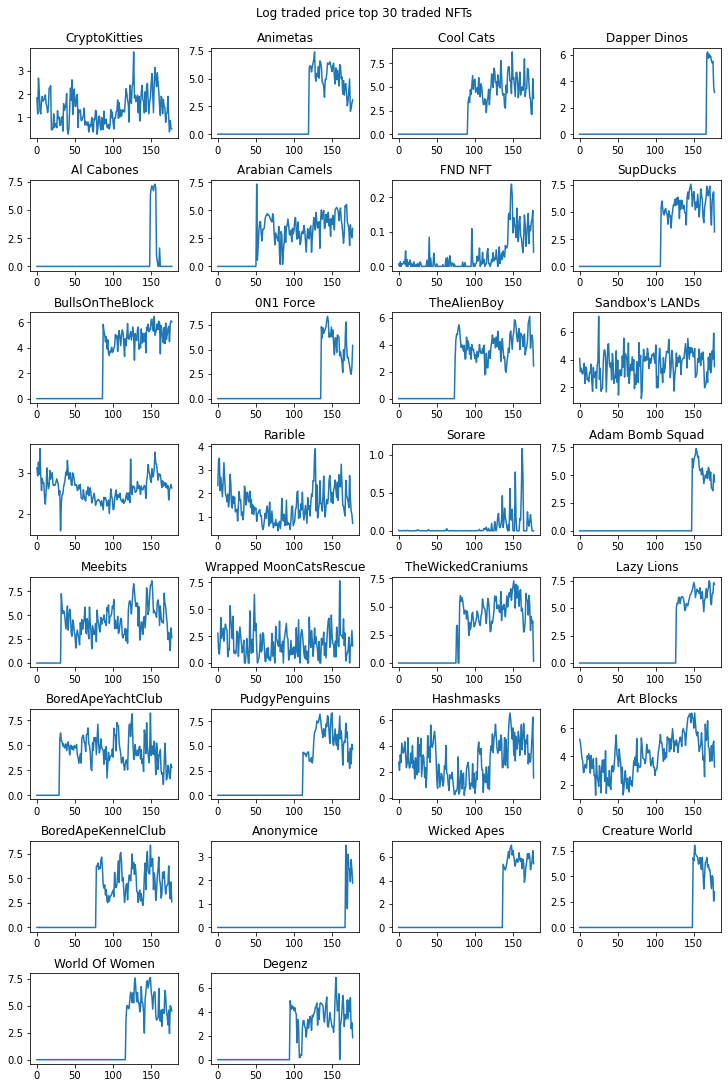

In [144]:
import matplotlib.pyplot as plt
import pandas as pd
import sqlite3


# Create a SQL connection to our SQLite database
con = sqlite3.connect("../DataOtherSources/EthereumNFTs/nfts.sqlite")

cur = con.cursor()
nftAddressNames = pd.read_sql_query('SELECT * from nfts', con)
# Be sure to close the connection
con.close()

def trim_axs(axs, N):
    """
    Reduce *axs* to *N* Axes. All further Axes are removed from the figure.
    """
    axs = axs.flat
    for ax in axs[N:]:
        ax.remove()
    return axs[:N]

filled_nan_with_zero = pivot_mean_log.fillna(0)

figsize = (10, 15)
cols = 4
rows = filled_nan_with_zero.shape[1] // cols + 1

axs = plt.figure(figsize=figsize, constrained_layout=True).subplots(rows, cols)
axs = trim_axs(axs, 30)
for ax, case in zip(axs, range(filled_nan_with_zero.shape[0])):
    ax.set_title(nftAddressNames.loc[nftAddressNames['address'] == str(filled_nan_with_zero.iloc[:,case].name)]["name"].values[0])
    ax.plot(range(filled_nan_with_zero.shape[0]),filled_nan_with_zero.iloc[:,case])

plt.suptitle('Log traded price top 30 traded NFTs')
plt.show()

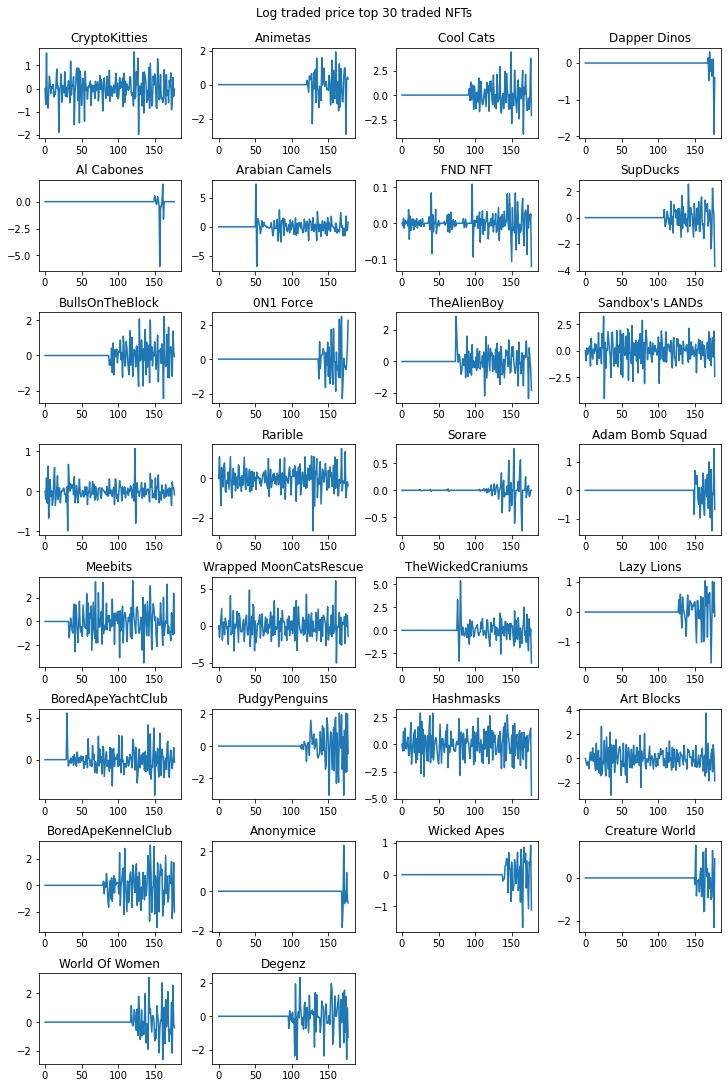

In [145]:
import matplotlib.pyplot as plt
import pandas as pd
import sqlite3


# Create a SQL connection to our SQLite database
con = sqlite3.connect("../DataOtherSources/EthereumNFTs/nfts.sqlite")

cur = con.cursor()
nftAddressNames = pd.read_sql_query('SELECT * from nfts', con)
# Be sure to close the connection
con.close()

def trim_axs(axs, N):
    """
    Reduce *axs* to *N* Axes. All further Axes are removed from the figure.
    """
    axs = axs.flat
    for ax in axs[N:]:
        ax.remove()
    return axs[:N]

filled_nan_with_zero = pivot_difference_log.fillna(0)

figsize = (10, 15)
cols = 4
rows = filled_nan_with_zero.shape[1] // cols + 1

axs = plt.figure(figsize=figsize, constrained_layout=True).subplots(rows, cols)
axs = trim_axs(axs, 30)
for ax, case in zip(axs, range(filled_nan_with_zero.shape[0])):
    ax.set_title(nftAddressNames.loc[nftAddressNames['address'] == str(filled_nan_with_zero.iloc[:,case].name)]["name"].values[0])
    ax.plot(range(filled_nan_with_zero.shape[0]),filled_nan_with_zero.iloc[:,case])

plt.suptitle('Log traded price top 30 traded NFTs')
plt.show()

In [81]:
tensor.shape

(5, 30, 178)

In [98]:
pivot_difference_log.shape

(178, 30)

In [84]:
from tslearn.metrics import soft_dtw
soft_dtw_score = soft_dtw(tensor[1,0,:], tensor[1,11,:], gamma=.1)

In [85]:
soft_dtw_score

306.6536838973194

In [90]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit_predict(np.array([tensor[1,0,:], tensor[1,12,:],tensor[1,13,:],tensor[1,17,:]]))

array([1, 1, 1, 0])

In [97]:
pd.DataFrame(np.array([tensor[1,0,:], tensor[1,12,:],tensor[1,13,:],tensor[1,17,:]])).to_csv("randomcluster.csv")